<a href="https://colab.research.google.com/github/rubenguerra/NLP/blob/main/hallarSpamSKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
file=files.upload()


Saving spam.tsv to spam.tsv


In [ ]:
df=pd.read_csv('spam.tsv', sep='\t')

In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.isnull()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [ ]:
len(df)

5572

In [ ]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
ham=df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [ ]:
len(ham)

4825

In [ ]:
spam=df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [ ]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [ ]:
ham =ham.sample(spam.shape[0])

In [ ]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [ ]:
data= ham.append(spam, ignore_index=True)

data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


Explorando los datos


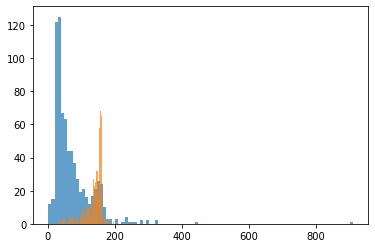

In [ ]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

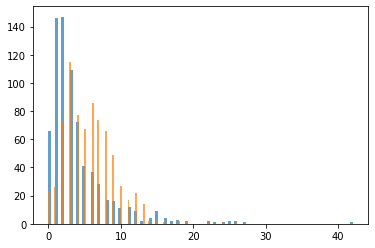

In [ ]:
plt.hist(data[data['label']=='ham']['punct'],bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100, alpha=0.7)

plt.show()

PREPARACION DE DATOS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import  Pipeline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
data.head()

,label,message,length,punct
0,ham,Company is very good.environment is terrific a...,70,3
1,ham,Well. You know what i mean. Texting,35,2
2,ham,Do have a nice day today. I love you so dearly.,47,2
3,ham,All sounds good. Fingers . Makes it difficult ...,53,2
4,ham,Its going good...no problem..but still need li...,102,8


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(data['message'],data['label'], test_size=0.3,random_state=0, shuffle=True,stratify=data['label'])

In [ ]:
X_train

1128    U’ve Bin Awarded £50 to Play 4 Instant Cash. C...
742     You got job in wipro:)you will get every thing...
477              How much is blackberry bold2 in nigeria.
542     Hello lover! How goes that new job? Are you th...
1277    Ringtone Club: Gr8 new polys direct to your mo...
                              ...                        
1211    Bloomberg -Message center +447797706009 Why wa...
312     ME 2 BABE I FEEL THE SAME LETS JUST 4GET ABOUT...
268         Doing nothing, then u not having dinner w us?
272     He says hi and to get your ass back to south t...
1222    Text BANNEDUK to 89555 to see! cost 150p texto...
Name: message, Length: 1045, dtype: object

In [ ]:
y_train

1128    spam
742      ham
477      ham
542      ham
1277    spam
        ... 
1211    spam
312      ham
268      ham
272      ham
1222    spam
Name: label, Length: 1045, dtype: object

CREACION DE LA BOLSA DE PALABRAS

In [ ]:
vectorizer=TfidfVectorizer()

In [ ]:
X_train=vectorizer.fit_transform(X_train)

In [ ]:
X_train.shape

(1045, 3666)

In [ ]:
X_train

<1045x3666 sparse matrix of type '<class 'numpy.float64'>'
	with 17662 stored elements in Compressed Sparse Row format>

PIPELINE y RF

In [ ]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [ ]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[223,   2],
       [ 23, 201]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       225
        spam       0.99      0.90      0.94       224

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [ ]:
accuracy_score(y_test, y_pred)

0.9443207126948775

In [ ]:
clf.predict(['Hey, wassup?'])

array(['ham'], dtype=object)

In [ ]:
clf.predict(['Congratulations, you won?'])

array(['ham'], dtype=object)

In [ ]:
clf.predict(["you won tickets to the USA this summer."])

array(['ham'], dtype=object)

SVM

In [ ]:
clf=Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C=100, gamma='auto'))])

In [ ]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[224,   1],
       [ 29, 195]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       225
        spam       0.99      0.87      0.93       224

    accuracy                           0.93       449
   macro avg       0.94      0.93      0.93       449
weighted avg       0.94      0.93      0.93       449

